**This notebook implements a VGG16 on OCT image dataset to classify the diseases**



In [ ]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [ ]:
# Import the required libraries

import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"anilshankars","key":"7f62438a75621f6392490d3cf0a8a8ae"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           9444        287  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           5038        160  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            692         42  0.88235295       
sameepvani/nasa-nearest-earth-objects                       

In [ ]:
!kaggle kernels output sohanpatnaik/vgg16 -p /path/to/dest

Kernel log downloaded to /path/to/dest/vgg16.log 


In [ ]:
!kaggle kernels output sohanpatnaik/vgg16 -p /path/to/dest

Kernel log downloaded to /path/to/dest/vgg16.log 


In [ ]:
!kaggle kernels output sohanpatnaik/vgg16 -p /path/to/dest

Kernel log downloaded to /path/to/dest/vgg16.log 


In [ ]:
# Store the base directory path

base_dir = os.path.join("/kaggle/input/kermany2018/oct2017/OCT2017 /")
print('Base directory --> ', os.listdir(base_dir))

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Store the train, validation and test directory paths

train_dir = os.path.join(base_dir + "train/")
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = os.path.join(base_dir + "val/")
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = os.path.join(base_dir + "test/")
print("Test Directory --> ", os.listdir(test_dir))

FileNotFoundError: ignored

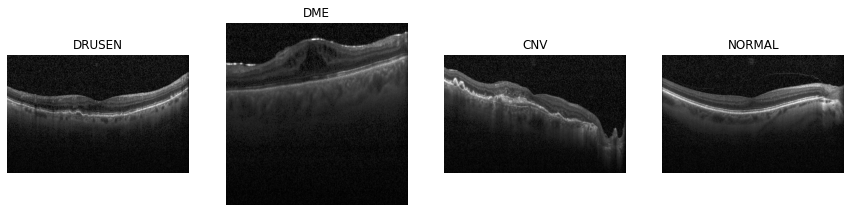

In [ ]:
# Plot each type of image in the dataset

fig, ax = plt.subplots(1, 4, figsize=(15, 10))

drusen = random.choice(os.listdir(train_dir + "DRUSEN"))
drusen_image = load_img(train_dir + "DRUSEN/" + drusen)
ax[0].imshow(drusen_image)
ax[0].set_title("DRUSEN")
ax[0].axis("Off")

dme = random.choice(os.listdir(train_dir + "DME"))
dme_image = load_img(train_dir + "DME/" + dme)
ax[1].imshow(dme_image)
ax[1].set_title("DME")
ax[1].axis("Off")

cnv = random.choice(os.listdir(train_dir + "CNV"))
cnv_image = load_img(train_dir + "CNV/" + cnv)
ax[2].imshow(cnv_image)
ax[2].set_title("CNV")
ax[2].axis("Off")

normal = random.choice(os.listdir(train_dir + "NORMAL"))
normal_image = load_img(train_dir + "NORMAL/" + normal)
ax[3].imshow(normal_image)
ax[3].set_title("NORMAL")
ax[3].axis("Off")

plt.show()

In [ ]:
INPUT_SHAPE = (150, 150, 3)

In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = INPUT_SHAPE, 
    pooling = None, 
    classes = 1000
)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
    
    vgg16,
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 2, 2, 64)          294976    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 15,035,768
Trainable params: 321,080
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
metrics_list = ['accuracy',
                tf.keras.metrics.AUC(),
                tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4)]

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = metrics_list)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), class_mode = 'categorical', batch_size = 100)

Found 83484 images belonging to 4 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150, 150), class_mode = 'categorical', batch_size = 16)

Found 32 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), class_mode = 'categorical', batch_size = 44)

Found 968 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = (83484/100),
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = (32/16),
    verbose = 1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
834/834 [==============================] - 867s 1s/step - loss: 0.5763 - accuracy: 0.7905 - auc: 0.9379 - cohen_kappa: 0.6753 - f1_score: 0.6695 - val_loss: 0.2825 - val_accuracy: 0.8438 - val_auc: 0.9850 - val_cohen_kappa: 0.7917 - val_f1_score: 0.8405
Epoch 2/10
834/834 [==============================] - 289s 346ms/step - loss: 0.3340 - accuracy: 0.8805 - auc: 0.9794 - cohen_kappa: 0.8196 - f1_score: 0.8161 - val_loss: 0.1745 - val_accuracy: 0.9062 - val_auc: 0.9956 - val_cohen_kappa: 0.8750 - val_f1_score: 0.9081
Epoch 3/10
834/834 [==============================] - 290s 347ms/step - loss: 0.2949 - accuracy: 0.8963 - auc: 0.9837 - cohen_kappa: 0.8438 - f1_score: 0.8417 - val_loss: 0.2132 - val_accuracy: 0.9062 - val_auc: 0.9924 - val_cohen_kappa: 0.8750 - val_f1_score: 0.9081
Epoch 4/10
834/834 [==============================] - 291s 349ms/step - loss: 0.2694 - accuracy: 0.9051 - auc: 0.9861 - cohen_kappa: 0.8576 - f1_score: 0.8561 - val_loss: 0.0960 - val_accuracy: 0.968

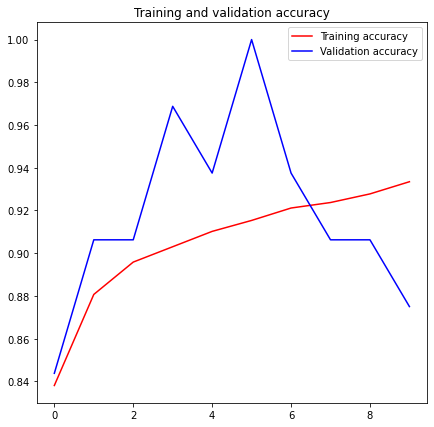

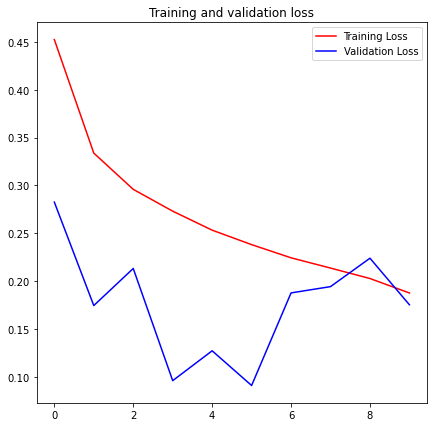

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize = (7,7))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.predict(test_generator, steps = int(968/44))

array([[9.9998295e-01, 1.6216432e-05, 7.7270391e-07, 3.1908815e-08],
       [1.9528106e-04, 6.0999035e-03, 5.1466762e-03, 9.8855817e-01],
       [9.8303729e-01, 1.6843939e-02, 1.1426181e-04, 4.5799538e-06],
       ...,
       [2.0919972e-04, 8.9503487e-04, 1.1477596e-02, 9.8741817e-01],
       [1.7956594e-07, 6.1352638e-04, 2.7413215e-03, 9.9664503e-01],
       [5.8954684e-03, 9.6339834e-01, 2.2628971e-03, 2.8443217e-02]],
      dtype=float32)

In [ ]:
model.evaluate(test_generator)

22/22 [==============================] - 3s 135ms/step - loss: 0.1236 - accuracy: 0.9576 - auc: 0.9969 - cohen_kappa: 0.9435 - f1_score: 0.9573


[0.12362855672836304,
 0.9576446413993835,
 0.9969373345375061,
 0.9435261487960815,
 array([0.94163424, 0.9813664 , 0.9227373 , 0.9835391 ], dtype=float32)]

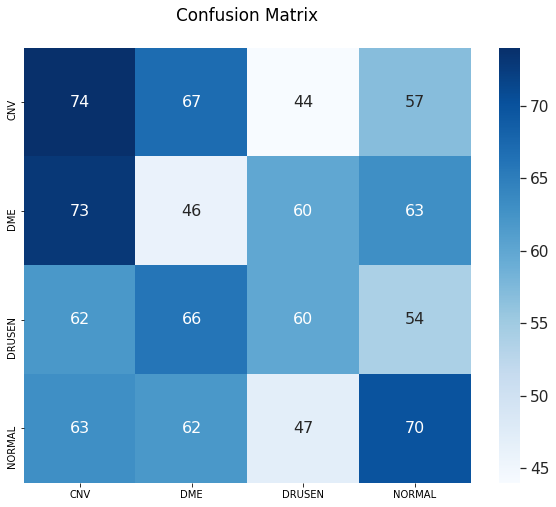

Classification Report

              precision    recall  f1-score   support

         CNV       0.27      0.31      0.29       242
         DME       0.19      0.19      0.19       242
      DRUSEN       0.28      0.25      0.26       242
      NORMAL       0.29      0.29      0.29       242

    accuracy                           0.26       968
   macro avg       0.26      0.26      0.26       968
weighted avg       0.26      0.26      0.26       968



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

Y_pred = model.predict(test_generator, int(968/44))
y_pred = np.argmax(Y_pred, axis = 1)

cm = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(cm, list(test_generator.class_indices.keys()), list(test_generator.class_indices.keys()))

fig, ax = plt.subplots(figsize = (10,8))
sns.set(font_scale = 1.4) # for label size
sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16}, cmap = plt.cm.Blues)
plt.title('Confusion Matrix\n')
plt.savefig('confusion_matrix.png', transparent = False, bbox_inches = 'tight', dpi = 400)
plt.show()

print('Classification Report\n')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names = target_names))